In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
# Reading the data from the file
data = pd.read_csv('/kaggle/input/iris-classification-dataset/iris/bezdekIris.data')
data.columns = ['sepal_length','sepal_width','petal_length','petal_width','species']
print(data)

     sepal_length  sepal_width  petal_length  petal_width         species
0             4.9          3.0           1.4          0.2     Iris-setosa
1             4.7          3.2           1.3          0.2     Iris-setosa
2             4.6          3.1           1.5          0.2     Iris-setosa
3             5.0          3.6           1.4          0.2     Iris-setosa
4             5.4          3.9           1.7          0.4     Iris-setosa
..            ...          ...           ...          ...             ...
144           6.7          3.0           5.2          2.3  Iris-virginica
145           6.3          2.5           5.0          1.9  Iris-virginica
146           6.5          3.0           5.2          2.0  Iris-virginica
147           6.2          3.4           5.4          2.3  Iris-virginica
148           5.9          3.0           5.1          1.8  Iris-virginica

[149 rows x 5 columns]


In [3]:
# table information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
# calculates Null values 
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

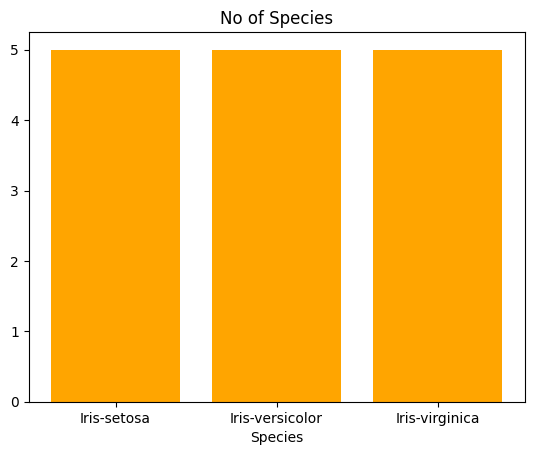

In [5]:
# values counting of species with graph
plt.bar(data['species'],height= 5,color = 'orange')
plt.xlabel('Species')
plt.title('No of Species')
plt.show()

In [6]:
# printing independent values and dependent values
x = data[['sepal_length','sepal_width','petal_length','petal_width']]
print(x)
y = data['species']
print(y)


     sepal_length  sepal_width  petal_length  petal_width
0             4.9          3.0           1.4          0.2
1             4.7          3.2           1.3          0.2
2             4.6          3.1           1.5          0.2
3             5.0          3.6           1.4          0.2
4             5.4          3.9           1.7          0.4
..            ...          ...           ...          ...
144           6.7          3.0           5.2          2.3
145           6.3          2.5           5.0          1.9
146           6.5          3.0           5.2          2.0
147           6.2          3.4           5.4          2.3
148           5.9          3.0           5.1          1.8

[149 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: species, Length: 149, dtype: obj

In [7]:
# Split the values 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [8]:
# Create a model using regression 
log_reg = linear_model.LogisticRegression(max_iter = 10)


In [ ]:
#train the model
log_reg.fit(x_train,y_train)

In [10]:
#Predict the model
model_pred = log_reg.predict(x_test)
print(model_pred)

['Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor']


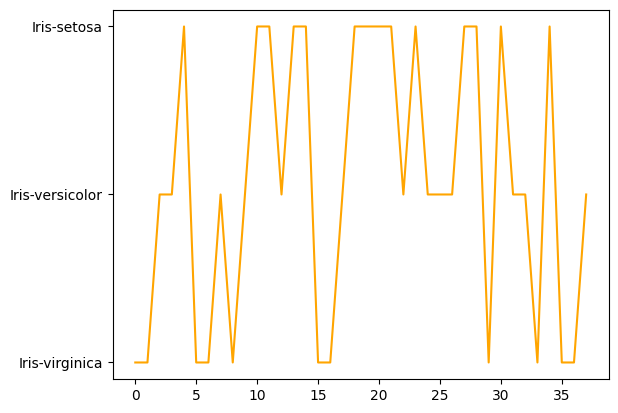

In [11]:
# draw graph predict values
plt.plot(model_pred,color = 'orange')
plt.show()

In [30]:
# accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix
matrix = confusion_matrix(y_test,model_pred)
acc_score = accuracy_score(y_test,model_pred)*100
pre_score = precision_score(y_test,model_pred,average='macro')*100
recall_score = recall_score(y_test,model_pred,average='macro')*100
print(f'confusion matrix: \n {matrix}')
print(f'Accuracy score :{score:.3f}')
print(f'precision score :{score:.3f}')
print(f'recall score :{score:.3f}')

confusion matrix: 
 [[14  0  0]
 [ 0 13  1]
 [ 0  0 10]]
Accuracy score :97.368
precision score :97.368
recall score :97.368


In [18]:
# prediction values
model_df = pd.DataFrame({'sepal_length' :[5.1,6.3,7.1],'sepal_width':[3.5,3.3,3.0] ,'petal_length':[1.4,4.7,6.9],'petal_width' :[0.2,1.6,2.3]})
result = log_reg.predict(model_df)
print(result)


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
